## Regionalisierung der Nachfrageflexibilisierung

Regionalisieriung der Nachfrageflexibilisierung, die in der main-Datei ermittelt wurde.

Fügt dem Ausgabeordner die Flexibilitäten eines Szenarios je Landkreis und ausgewählten Wirtschaftszweigen mit entsprechendem Namen hinzu.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xlsxwriter

# Bitte die 'disaggregator'-library installieren. https://github.com/DemandRegioTeam/disaggregator
from disaggregator import config, data, spatial, temporal, plot
get_ipython().run_line_magic('matplotlib', 'qt')

In [2]:
inputEnv = 'C:/Users/xy/data_in' # Bitte anpassen
outpathEnv = 'C:/Users/xy/Output'  # Bitte anpassen

In [ ]:
"""
Erstellen einer Matrix mit anteiligen Mitarbeitern je Branche und Landkreis.


----------
wz : int
    Ganzzahl des Wirtschaftszweigs (6471, 47, 55, 86, 85).
bzeLK : DataFrame
    Bezugseinheiten (Anzahl Mitarbeiter) je Landkreis und Branche.
bzeLK_norm_df : DataFrame
    DataFrame mit anteiligen (normalisierten) Mitarbeitern je Landkreis und Branche.
wz47 ... wz6471 : Parameter
    DataFrame mit nach Wirtschaftszweig vorgefilterten anteiligen Mitarbeitern je Landkreis und Branche. 

"""

# Auswahl der betrachteten Wirtschaftszweige muss unten getroffen werden

bzeLK = pd.read_excel((inputEnv+'/BZEjeLK.xlsx'), sheet_name='BZEjeLK.xlsx') # Import der absoluten Anzahl Mitarbeiter (BZE) je Landkreis und Branche

bzeLK_norm = []

# Anteilige Mitarbeiter je Landkreis in einer Branche
for row in range(len(bzeLK)) : 
    sum = bzeLK.loc[row, 'SUM']
    bze_spec = bzeLK.iloc[row, 2:] / sum
    bzeLK_norm.append(bze_spec)

bzeLK_norm_df = pd.DataFrame(bzeLK_norm)
bzeLK_norm_df = pd.concat([bzeLK['WZ'], bzeLK_norm_df], axis = 1)

# Filter nach branchen- und LK-spezifischen Mitarbeiter-Anteilen
wz47 = bzeLK_norm_df.loc[bzeLK_norm_df['WZ'] == 47]
wz55 = bzeLK_norm_df.loc[bzeLK_norm_df['WZ'] == 55]
wz85 = bzeLK_norm_df.loc[bzeLK_norm_df['WZ'] == 85]
wz86 = bzeLK_norm_df.loc[bzeLK_norm_df['WZ'] == 86]
wz6471 = bzeLK_norm_df.loc[(bzeLK_norm_df['WZ'] == 64) | 
                          (bzeLK_norm_df['WZ'] == 65) |
                          (bzeLK_norm_df['WZ'] == 66) |
                          (bzeLK_norm_df['WZ'] == 68) |
                          (bzeLK_norm_df['WZ'] == 69) |
                          (bzeLK_norm_df['WZ'] == 70) |
                          (bzeLK_norm_df['WZ'] == 71)]
wz6471.loc['sum', :] = wz6471.sum() / 7 

In [ ]:
"""
Import der fortgeschriebenen Lasten je Wirtschaftszweig und Szenario

----------
basis_Szenario_47 ... 86 : DataFrame
    Fortgeschriebene Lasten des Jahres 2035 je Wirtschaftszweig im Basisszenario (basis) in PJ
basis_Szenario_55_anwd ... 86_anwd : DataFrame
    Fortgeschriebene anwendungstechnologische Lasten des Jahres 2035 je Wirtschaftszweig im Basisszenario (basis) in MW (bwz. MWh für Energiemengen)

"""

# Input in PJ (für Lasten) und PJ/4 für Energiemengen (Emax, Emin)
# Output in MW (für Lasten) und MWh für Energiemengen (Emax, Emin)

outpathEnv_main = 'Results_19032021-10-03-54_Annahmen_Opti'  # Bitte anpassen

basis_Szenario_47 = pd.read_excel((outpathEnv_main+'/BasisSzenario_47.xlsx'))
basis_Szenario_55 = pd.read_excel((outpathEnv_main+'/BasisSzenario_55.xlsx'))
basis_Szenario_86 = pd.read_excel((outpathEnv_main+'/BasisSzenario_86.xlsx'))
basis_Szenario_6471 = pd.read_excel((outpathEnv_main+'/BasisSzenario_6471.xlsx'))
basis_Szenario_85 = pd.read_excel((outpathEnv_main+'/BasisSzenario_85.xlsx'))

# Set Date-time as index
year = 2018
dt_index = pd.date_range(start= str(year) + '-01-01 00:00:00', end= str(year)+'-12-31 23:45:00', freq="15T")

basis_Szenario_47.set_index(dt_index, inplace = True)
basis_Szenario_47_anwd = basis_Szenario_47.iloc[:,7:]
basis_Szenario_47_anwd = basis_Szenario_47_anwd * (4000000/3.6) # Umrechnung von PJ in MW (bzw. PJ/4 in MWh)

basis_Szenario_55.set_index(dt_index, inplace = True)
basis_Szenario_55_anwd = basis_Szenario_55.iloc[:,7:]
basis_Szenario_55_anwd = basis_Szenario_55_anwd * (4000000/3.6) # Umrechnung von PJ in MW (bzw. PJ/4 in MWh)

basis_Szenario_6471.set_index(dt_index, inplace = True)
basis_Szenario_6471_anwd = basis_Szenario_6471.iloc[:,7:]
basis_Szenario_6471_anwd = basis_Szenario_6471_anwd * (4000000/3.6) # Umrechnung von PJ in MW (bzw. PJ/4 in MWh)

basis_Szenario_85.set_index(dt_index, inplace = True)
basis_Szenario_85_anwd = basis_Szenario_85.iloc[:,7:]
basis_Szenario_85_anwd = basis_Szenario_85_anwd * (4000000/3.6) # Umrechnung von PJ in MW (bzw. PJ/4 in MWh)

basis_Szenario_86.set_index(dt_index, inplace = True)
basis_Szenario_86_anwd = basis_Szenario_86.iloc[:,7:]
basis_Szenario_86_anwd = basis_Szenario_86_anwd * (4000000/3.6) # Umrechnung von PJ in MW (bzw. PJ/4 in MWh)



In [ ]:
"""
Erstellen eines dictionary (keys: LK, value: pandas df), das jedem LK ein DataFrame zuordnet. 

----------
lk : int
    Ganzzahl des Landkreises (4-5-stellig, basierend auf Amtlicher Gemeindeschlüssel (ags_lk)).
wz47 ... wz6471 : Parameter
    DataFrame mit nach Wirtschaftszweig vorgefilterten anteiligen Mitarbeitern je Landkreis und Branche. 
d47 ... d6471 : Dictionary
    Dictionary mit je einem DataFrame je Landkreis. Das Dataframe beinhaltet die branchenspezifischen, regionalisierten, anwendungsspezifischen Lasten und Flex-Potenziale. 

"""

d47 = {str(lk): pd.DataFrame() for lk in wz47.columns}
for lk in wz47.columns : 
    d47[str(lk)] = basis_Szenario_47_anwd.copy().multiply(wz47[lk].values[0], axis=1)

d55 = {str(lk): pd.DataFrame() for lk in wz55.columns}
for lk in wz55.columns : 
    d55[str(lk)] = basis_Szenario_55_anwd.copy().multiply(wz55[lk].values[0], axis=1)    

d85 = {str(lk): pd.DataFrame() for lk in wz85.columns}
for lk in wz85.columns : 
    d85[str(lk)] = basis_Szenario_85_anwd.copy().multiply(wz85[lk].values[0], axis=1)       
    
d86 = {str(lk): pd.DataFrame() for lk in wz86.columns}
for lk in wz86.columns : 
    d86[str(lk)] = basis_Szenario_86_anwd.copy().multiply(wz86[lk].values[0], axis=1)
    
d6471 = {str(lk): pd.DataFrame() for lk in wz6471.columns}
for lk in wz6471.columns : 
    d6471[str(lk)] = basis_Szenario_6471_anwd.copy().multiply(wz6471.loc['sum', [lk]].values[0], axis=1)

In [ ]:
"""
Ausgabe des Dictionary in csv-Dateien

Vorsicht! In der Ausgabe von fünf Wirtschaftszweigen je 401 Landkreise werden bis zu 28 GB csv-Dateien geschrieben. 
"""

# Convert dictionary in csv

ct = 0

for key, df47 in d47.items():
    df47.to_csv(outpathEnv+key+'_wz47'+'.csv')
    perc = float(round((ct/402)*100, 2))  # 401 lk
    x = "Progress: " + str(perc) + "%"
    print("\r" + x, end=' ')
    ct = ct+1

for key, df55 in d55.items():
    df55.to_csv(outpathEnv+key+'_wz55'+'.csv')  
    perc = float(round((ct/402)*100, 2))  # 401 lk
    x = "Progress: " + str(perc) + "%"
    print("\r" + x, end=' ')
    ct = ct+1

for key, df85 in d85.items():
    df85.to_csv(outpathEnv+key+'_wz85'+'.csv')    
    perc = float(round((ct/402)*100, 2))  # 401 lk
    x = "Progress: " + str(perc) + "%"
    print("\r" + x, end=' ')
    ct = ct+1
    
for key, df86 in d86.items():
    df86.to_csv(outpathEnv+key+'_wz86'+'.csv')
    perc = float(round((ct/402)*100, 2))  # 401 lk
    x = "Progress: " + str(perc) + "%"
    print("\r" + x, end=' ')
    ct = ct+1
    
for key, df6471 in d6471.items():
    df6471.to_csv(outpathEnv+key+'_wz6471'+'.csv')
    perc = float(round((ct/402)*100, 2))  # 401 lk
    x = "Progress: " + str(perc) + "%"
    print("\r" + x, end=' ')
    ct = ct+1

In [ ]:
"""
Erstellen eines landkreisspezifischen DataFrame mit Lasten und Flexibilitäten ausgewählter Wirtschaftszweige 

Vorsicht! In der Ausgabe von fünf Wirtschaftszweigen je 401 Landkreise werden (analog zu oben) bis zu 28 GB csv-Dateien geschrieben. 

----------

lk : int
    Ganzzahl des Landkreises (4-5-stellig, basierend auf Amtlicher Gemeindeschlüssel (ags_lk)).
lk_df : DataFrame
    Landkreisspezifisches DataFrame mit Lasten und Flexibilitäten ausgewählter Wirtschaftszweige 
    
"""


# wz und lk hier auswählen
wz_filter = ['47', '55', '6471', '85', '86']
lk_filter = bzeLK_norm_df.columns[1:] #['1001','1057'] für ausgewählte lk

ct = 0

for lk in lk_filter :
    appended_df = []
    for wz in wz_filter : 

        df = (pd.read_csv(outpathEnv + str(lk) + '_wz' + str(wz) +'.csv', parse_dates = True))
        appended_df.append(df)

    lk_df = pd.concat(appended_df, axis = 1, keys = wz_filter)
    lk_df.set_index(lk_df.iloc[:,0], inplace = True)

    perc = float(round((ct/402)*100, 2))  # 401 lk
    x = "Progress: " + str(perc) + "%"
    print("\r" + x, end=' ')
    ct = ct+1
    
    for wz in wz_filter:
        while True:
            try:
                lk_df = lk_df.drop((str(wz), 'Unnamed: 0'), axis = 1)
            except: 
                break
    #lk_df.to_csv(outpathEnv+str(lk)+'_selected_wz'+'.csv', sep=';', decimal=',', encoding='iso-8859-1') # leichter lesbar in excel
    lk_df.to_csv(outpathEnv+str(lk)+'_selected_wz'+'.csv')
    

In [ ]:
# Bildet die Summe einzelner Anwendungen über alle WZ je LK
lk_total = lk_df.groupby(level=1, axis=1).sum() # Level 1 spezifiziert den Multiindex (level 0: WZ, level 1: Anwendung)
lk_total.head()

# Durchschnitt zur Darstellung in Choropleth-Map
lk_total_mean_df = lk_total.mean()
lk_total_mean_df.head()


In [4]:
"""
Berechnen des Jahresdurchschnitts der Flex-potenziale (Emax, Emin, Pmax, Pmin) über alle vier Anwendungen je Landkreis

----------

lk : int
    Ganzzahl des Landkreises (4-5-stellig, basierend auf Amtlicher Gemeindeschlüssel (ags_lk)).
lk_flex_df_mean, lk_flex_Pmax_df_mean, lk_flex_Pmin_df_mean, lk_flex_Emin_df_mean: DataFrame
    Jahresdurchschnitt aggregiert über alle vier Anwendungen. Output: Liste mit mittlerer Emax, Pmax, Pmin, Emin je Landkreis
    
"""

# Berechnet den Jahresdurchschnitt der Flex-potenziale (Emax) über alle vier Anwendungen je Landkreis

# Falls oben noch nicht spezifiziert: Auswahl der zu betrachtenden Landkreise. Default - alle Landkreise
lk_filter = bzeLK_norm_df.columns[1:] #['1001','1057'] für ausgewählte lk

ct = 0

appended_df = []
for lk in lk_filter :
    df = (pd.read_csv(outpathEnv+str(lk)+'_selected_wz'+'.csv', header=[0, 1], skipinitialspace=True, parse_dates = True))
    appended_df.append(df)
    test_df = pd.concat(appended_df, axis = 1, keys = lk_filter)

    perc = float(round((ct/402)*100, 2))  # 401 lk
    x = "Progress: " + str(perc) + "%"
    print("\r" + x, end=' ')
    ct = ct+1
    
# Filtert nach Flexanwendungen Emax in Multiindex
lk_flexanwendung_df = test_df.loc[:, (slice(None), slice(None), ('Lüftung (Mechanische Energie)_Emax', 
                                                                 'Klimakälte_Emax', 
                                                                 'Prozesskälte_Emax', 
                                                                 'Raumwärme und Warmwasser_Emax'))]

lk_flexanwendung_df_mean = lk_flexanwendung_df.mean() # Jahresdurchschnitt je Anwendung
lk_flex_df_mean = lk_flexanwendung_df_mean.groupby(level=0, axis=0).sum() # Jahresdurchschnitt aggregiert über alle vier Anwendungen. Output: Liste mit mittlerer Emax je LK
lk_flex_df_mean_sum = lk_flex_df_mean.sum() # Mittlerer Emax aller vier Anwendungen in ganz Deutschland

# Filtert nach Flexanwendungen Pmax in Multiindex
lk_flexanwendung_Pmax_df = test_df.loc[:, (slice(None), slice(None), ('Lüftung (Mechanische Energie)_Pmax', 
                                                                 'Klimakälte_Pmax', 
                                                                 'Prozesskälte_Pmax', 
                                                                 'Raumwärme und Warmwasser_Pmax'))]

lk_flexanwendung_Pmax_df_mean = lk_flexanwendung_Pmax_df.mean() # Jahresdurchschnitt je Anwendung
lk_flex_Pmax_df_mean = lk_flexanwendung_Pmax_df_mean.groupby(level=0, axis=0).sum() # Jahresdurchschnitt aggregiert über alle vier Anwendungen. Output: Liste mit mittlerer Emax je LK
lk_flex_Pmax_df_mean_sum = lk_flex_Pmax_df_mean.sum() # Mittlerer Pmax aller vier Anwendungen in ganz Deutschland

# Filtert nach Flexanwendungen Pmin in Multiindex
lk_flexanwendung_Pmin_df = test_df.loc[:, (slice(None), slice(None), ('Lüftung (Mechanische Energie)_Pmin', 
                                                                 'Klimakälte_Pmin', 
                                                                 'Prozesskälte_Pmin', 
                                                                 'Raumwärme und Warmwasser_Pmin'))]

lk_flexanwendung_Pmin_df_mean = lk_flexanwendung_Pmin_df.mean() # Jahresdurchschnitt je Anwendung
lk_flex_Pmin_df_mean = lk_flexanwendung_Pmin_df_mean.groupby(level=0, axis=0).sum() # Jahresdurchschnitt aggregiert über alle vier Anwendungen. Output: Liste mit mittlerer Emax je LK
lk_flex_Pmin_df_mean_sum = lk_flex_Pmin_df_mean.sum() # Mittlerer Pmin aller vier Anwendungen in ganz Deutschland

# Filtert nach Flexanwendungen Emin in Multiindex
lk_flexanwendung_Emin_df = test_df.loc[:, (slice(None), slice(None), ('Lüftung (Mechanische Energie)_Emin', 
                                                                 'Klimakälte_Emin', 
                                                                 'Prozesskälte_Emin', 
                                                                 'Raumwärme und Warmwasser_Emin'))]

lk_flexanwendung_Emin_df_mean = lk_flexanwendung_Emin_df.mean() # Jahresdurchschnitt je Anwendung
lk_flex_Emin_df_mean = lk_flexanwendung_Emin_df_mean.groupby(level=0, axis=0).sum() # Jahresdurchschnitt aggregiert über alle vier Anwendungen. Output: Liste mit mittlerer Emax je LK
lk_flex_Emin_df_mean_sum = lk_flex_Emin_df_mean.sum() # Mittlerer Emin aller vier Anwendungen in ganz Deutschland

Progress: 99.5%  

In [ ]:
"""
Ausgabe des Jahresdurchschnitts der Flexpotenziale (Emax) über alle vier Anwendungen je Landkreis

----------

dict_region_code : Dictionary
    Dictionary, das den Allgemeinen Gebietsschlüssel (ags_lk) auf Landkreisnamen ('name') oder NUTS-3 IDs ('natcode_nuts3') abbilden kann.
lk_flex_Emax_df_mean_names: DataFrame
    Jahresdurchschnitt der maximal verschiebbaren Energiemenge [MWh] aggregiert über alle vier Anwendungen und Wirtschaftszweige unter Verwendung des Landkreisnamens
    
"""
lk_flexanwendung_df_mean.head(10)
lk_flex_Emax_df_mean = lk_flexanwendung_df_mean.groupby(level=0).sum() # Level 1 spezifiziert den Multiindex (level 0: WZ, level 1: Anwendung)
lk_flex_Emax_df_mean_names = pd.DataFrame(lk_flex_Emax_df_mean.rename(index=config.dict_region_code(keys = 'ags_lk', values = 'name'))) # options for values = 'natcode_nuts3', 'name', 'ags_lk'
lk_flex_Emax_df_mean_names.columns = ['Emax [MWh]']
lk_flex_Emax_df_mean_names.head()

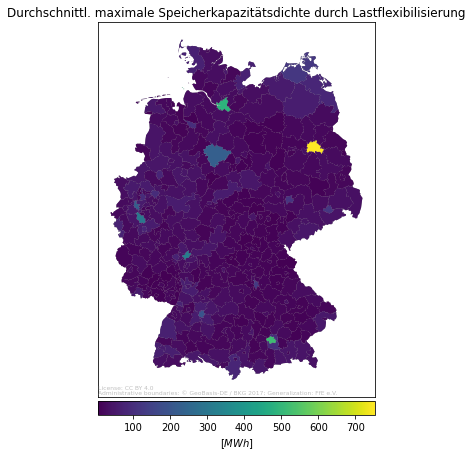

In [6]:
"""
Ausgabe des Jahresdurchschnitts der Flexpotenziale (Emax) über alle vier Anwendungen je Landkreis in Form einer Darstellung mittels Choroplethen-Karte aus dem DemandRegio Disaggregator tool

"""

# Austausch des Index von lk_flex_df_mean von vormals ags_lk zu natcode_nuts3 - um auf Funktion choropleth_map zurückzugreifen
lk_flex_Emax_df_mean_nuts3 = lk_flex_Emax_df_mean.rename(index=config.dict_region_code(keys = 'ags_lk', values = 'natcode_nuts3'))

# Möglichkeiten der Ergänzung: annotate = 'value'; annotate = 'name'; annotate = 'nuts3'
fig, ax = plot.choropleth_map(lk_flex_Emax_df_mean_nuts3, relative=False, unit='MWh', axtitle='Durchschnittl. maximale Speicherkapazitätsdichte durch Lastflexibilisierung')
plt.savefig(outputEnv + '/Choropleth_flex_je_LK_absolut.png',dpi=300)

In [15]:
"""
Ausgabe des Jahresdurchschnitts der Flexpotenziale (Pmax) über alle vier Anwendungen je Landkreis

Parameters
dict_region_code : Dictionary
    Dictionary, das den Allgemeinen Gebietsschlüssel (ags_lk) auf Landkreisnamen ('name') oder NUTS-3 IDs ('natcode_nuts3') abbilden kann.
lk_flex_Emax_df_mean_names: DataFrame
    Jahresdurchschnitt der maximal schaltbaren Last [MW] aggregiert über alle vier Anwendungen und Wirtschaftszweige unter Verwendung des Landkreisnamens
    
"""

lk_flexanwendung_Pmax_df_mean.head()
lk_flex_Pmax_df_mean = lk_flexanwendung_Pmax_df_mean.groupby(level=0).sum() # Level 1 spezifiziert den Multiindex (level 0: WZ, level 1: Anwendung)
lk_flex_Pmax_df_mean_names = pd.DataFrame(lk_flex_Pmax_df_mean.rename(index=config.dict_region_code(keys = 'ags_lk', values = 'name'))) # options for values = 'natcode_nuts3', 'name', 'ags_lk'
lk_flex_Pmax_df_mean_names.columns = ['Pmax [MW]']
lk_flex_Pmax_df_mean_names.head()

,Pmax [MW]
"Flensburg, Kreisfreie Stadt",2.602084
"Kiel, Kreisfreie Stadt",8.007897
"Lübeck, Kreisfreie Stadt",6.079390
"Neumünster, Kreisfreie Stadt",2.075309
Dithmarschen,2.514675


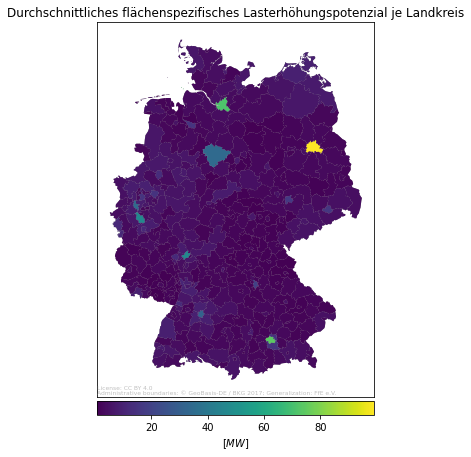

In [16]:
"""
Ausgabe des Jahresdurchschnitts der Flexpotenziale (Pmax) über alle vier Anwendungen je Landkreis in Form einer Darstellung mittels Choroplethen-Karte aus dem DemandRegio Disaggregator tool

"""

# Austausch des Index von lk_flex_df_mean von vormals ags_lk zu natcode_nuts3 - um auf Funktion choropleth_map zurückzugreifen
lk_flex_Pmax_df_mean_nuts3 = lk_flex_Pmax_df_mean.rename(index=config.dict_region_code(keys = 'ags_lk', values = 'natcode_nuts3'))

# Möglichkeiten der Ergänzung: annotate = 'value'; annotate = 'name'; annotate = 'nuts3'
fig, ax = plot.choropleth_map(lk_flex_Pmax_df_mean_nuts3, relative=False, unit='MW', axtitle='Durchschnittliches flächenspezifisches Lasterhöhungspotenzial je Landkreis')
plt.savefig(outputEnv + '/Choropleth_flex_Pmax_je_LK_absolut.png',dpi=300)

In [17]:
"""
Ausgabe des Jahresdurchschnitts der Flexpotenziale (Pmin) über alle vier Anwendungen je Landkreis

Parameters
dict_region_code : Dictionary
    Dictionary, das den Allgemeinen Gebietsschlüssel (ags_lk) auf Landkreisnamen ('name') oder NUTS-3 IDs ('natcode_nuts3') abbilden kann.
lk_flex_Emax_df_mean_names: DataFrame
    Jahresdurchschnitt der minimal schaltbaren Last [MW] aggregiert über alle vier Anwendungen und Wirtschaftszweige unter Verwendung des Landkreisnamens
    
"""

lk_flexanwendung_Pmin_df_mean.head()
lk_flex_Pmin_df_mean = lk_flexanwendung_Pmin_df_mean.groupby(level=0).sum() # Level 1 spezifiziert den Multiindex (level 0: WZ, level 1: Anwendung)
lk_flex_Pmin_df_mean_names = pd.DataFrame(lk_flex_Pmin_df_mean.rename(index=config.dict_region_code(keys = 'ags_lk', values = 'name'))) # options for values = 'natcode_nuts3', 'name', 'ags_lk'
lk_flex_Pmin_df_mean_names.columns = ['Pmin [MW]']
lk_flex_Pmin_df_mean_names.head()

,Pmin [MW]
"Flensburg, Kreisfreie Stadt",-3.227951
"Kiel, Kreisfreie Stadt",-9.602480
"Lübeck, Kreisfreie Stadt",-8.617463
"Neumünster, Kreisfreie Stadt",-2.624822
Dithmarschen,-3.769461


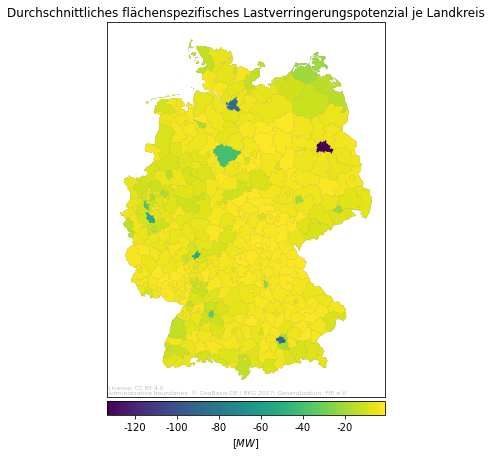

In [18]:
"""
Ausgabe des Jahresdurchschnitts der Flexpotenziale (Pmin) über alle vier Anwendungen je Landkreis in Form einer Darstellung mittels Choroplethen-Karte aus dem DemandRegio Disaggregator tool

"""

# Austausch des Index von lk_flex_df_mean von vormals ags_lk zu natcode_nuts3 - um auf Funktion choropleth_map zurückzugreifen
lk_flex_Pmin_df_mean_nuts3 = lk_flex_Pmin_df_mean.rename(index=config.dict_region_code(keys = 'ags_lk', values = 'natcode_nuts3'))

# Möglichkeiten der Ergänzung: annotate = 'value'; annotate = 'name'; annotate = 'nuts3'
fig, ax = plot.choropleth_map(lk_flex_Pmin_df_mean_nuts3, relative=False, unit='MW', axtitle='Durchschnittliches flächenspezifisches Lastverringerungspotenzial je Landkreis')
plt.savefig(outputEnv + '/Choropleth_flex_Pmin_je_LK_absolut.png',dpi=300)

In [19]:
"""
Ausgabe des Jahresdurchschnitts der Flexpotenziale (Emin) über alle vier Anwendungen je Landkreis

----------

dict_region_code : Dictionary
    Dictionary, das den Allgemeinen Gebietsschlüssel (ags_lk) auf Landkreisnamen ('name') oder NUTS-3 IDs ('natcode_nuts3') abbilden kann.
lk_flex_Emax_df_mean_names: DataFrame
    Jahresdurchschnitt der minimal verschiebbaren Energiemenge [MWh] aggregiert über alle vier Anwendungen und Wirtschaftszweige unter Verwendung des Landkreisnamens
    
"""

lk_flexanwendung_Emin_df_mean.head()
lk_flex_Emin_df_mean = lk_flexanwendung_Emin_df_mean.groupby(level=0).sum() # Level 1 spezifiziert den Multiindex (level 0: WZ, level 1: Anwendung)
lk_flex_Emin_df_mean_names = pd.DataFrame(lk_flex_Emin_df_mean.rename(index=config.dict_region_code(keys = 'ags_lk', values = 'name'))) # options for values = 'natcode_nuts3', 'name', 'ags_lk'
lk_flex_Emin_df_mean_names.columns = ['Emin [MWh]']
lk_flex_Emin_df_mean_names.head()

,Emin [MWh]
"Flensburg, Kreisfreie Stadt",-16.764852
"Kiel, Kreisfreie Stadt",-53.839468
"Lübeck, Kreisfreie Stadt",-47.460516
"Neumünster, Kreisfreie Stadt",-13.583134
Dithmarschen,-20.389005


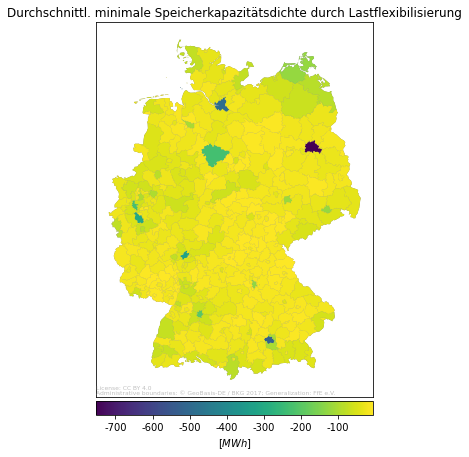

In [20]:
"""
Ausgabe des Jahresdurchschnitts der Flexpotenziale (Emin) über alle vier Anwendungen je Landkreis in Form einer Darstellung mittels Choroplethen-Karte aus dem DemandRegio Disaggregator tool

"""

# Austausch des Index von lk_flex_df_mean von vormals ags_lk zu natcode_nuts3 - um auf Funktion choropleth_map zurückzugreifen
lk_flex_Emin_df_mean_nuts3 = lk_flex_Emin_df_mean.rename(index=config.dict_region_code(keys = 'ags_lk', values = 'natcode_nuts3'))

# Möglichkeiten der Ergänzung: annotate = 'value'; annotate = 'name'; annotate = 'nuts3'
fig, ax = plot.choropleth_map(lk_flex_Emin_df_mean_nuts3, relative=False, unit='MWh', axtitle='Durchschnittl. minimale Speicherkapazitätsdichte durch Lastflexibilisierung')
plt.savefig(outputEnv + '/Choropleth_flex_Emin_je_LK_absolut.png',dpi=300)

In [13]:
"""
Ausgabe einer landkreisspezifischen Zusammenfassung der Flex-Potenziale (Pmax, Pmin, Emax, Emin) 

"""

zusammenfassung_df = pd.concat([lk_flex_Pmax_df_mean_names, lk_flex_Pmin_df_mean_names, lk_flex_Emax_df_mean_names, lk_flex_Emin_df_mean_names], axis=1, sort=False)
zusammenfassung_df.to_csv(outpathEnv +'Zusammenfassung_regionalisiert'+'.csv', sep=';', decimal=',', encoding='iso-8859-1') # leichter lesbar in excel
zusammenfassung_df.head()

,Pmax [MW],Pmin [MW],Emax [MWh],Emin [MWh]
"Flensburg, Kreisfreie Stadt",2.602084,-3.227951,16.781794,-16.764852
"Kiel, Kreisfreie Stadt",8.007897,-9.602480,53.887909,-53.839468
"Lübeck, Kreisfreie Stadt",6.079390,-8.617463,47.493292,-47.460516
"Neumünster, Kreisfreie Stadt",2.075309,-2.624822,13.596522,-13.583134
Dithmarschen,2.514675,-3.769461,20.402937,-20.389005
